In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("haberman.data", low_memory=False, names=["Age", "Operation_Year", "Pos_Aux_Nodes", "Survival_Status"])

#### Data description

1. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

2. Number of Instances: 306

3. Number of Attributes: 4 (including the class attribute)

4. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

In [3]:
df.head()

,Age,Operation_Year,Pos_Aux_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<AxesSubplot:>

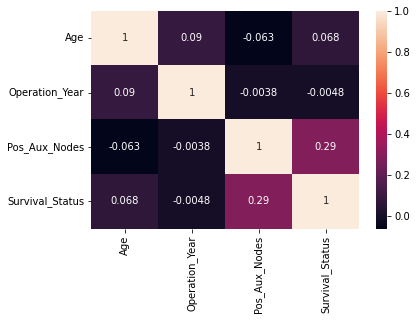

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
df.corr()['Survival_Status'].sort_values()

Operation_Year    -0.004768
Age                0.067950
Pos_Aux_Nodes      0.286768
Survival_Status    1.000000
Name: Survival_Status, dtype: float64

<AxesSubplot:xlabel='Survival_Status', ylabel='Pos_Aux_Nodes'>

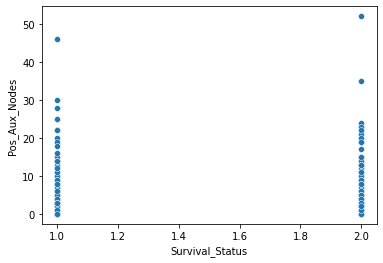

In [6]:
sns.scatterplot(x="Survival_Status", y="Pos_Aux_Nodes", data=df)

<AxesSubplot:xlabel='Survival_Status', ylabel='Age'>

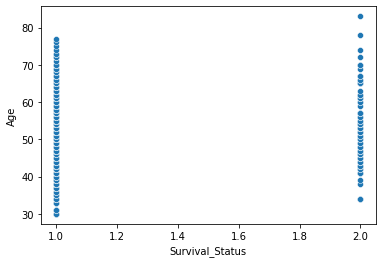

In [7]:
sns.scatterplot(x="Survival_Status", y="Age", data=df)

In [8]:
df.describe()

,Age,Operation_Year,Pos_Aux_Nodes,Survival_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


/home/filip/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pos_Aux_Nodes', ylabel='Density'>

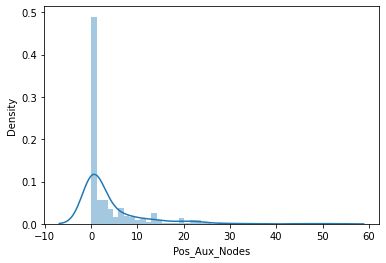

In [9]:
sns.distplot(df["Pos_Aux_Nodes"])

In [10]:
df['Pos_Aux_Nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Pos_Aux_Nodes, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_Year   306 non-null    int64
 2   Pos_Aux_Nodes    306 non-null    int64
 3   Survival_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


##### **No outliers, NA values or categorical data has beed detected in the dataset.**

In [12]:
def survived_explanation(row):
    if row == 1:
        return "5 years or longer"
    elif row == 2:
        return "died within 5 year"


In [13]:
df["Live_On"] = df["Survival_Status"].apply(lambda x: survived_explanation(x))

In [14]:
df

,Age,Operation_Year,Pos_Aux_Nodes,Survival_Status,Live_On
0,30,64,1,1,5 years or longer
1,30,62,3,1,5 years or longer
2,30,65,0,1,5 years or longer
3,31,59,2,1,5 years or longer
4,31,65,4,1,5 years or longer
...,...,...,...,...,...
301,75,62,1,1,5 years or longer
302,76,67,0,1,5 years or longer
303,77,65,3,1,5 years or longer
304,78,65,1,2,died within 5 year


In [15]:
new_df = df.copy()

In [16]:
new_df.head()

,Age,Operation_Year,Pos_Aux_Nodes,Survival_Status,Live_On
0,30,64,1,1,5 years or longer
1,30,62,3,1,5 years or longer
2,30,65,0,1,5 years or longer
3,31,59,2,1,5 years or longer
4,31,65,4,1,5 years or longer


In [17]:
new_df.drop(columns=["Survival_Status"], inplace=True)

In [18]:
new_df.head()

,Age,Operation_Year,Pos_Aux_Nodes,Live_On
0,30,64,1,5 years or longer
1,30,62,3,5 years or longer
2,30,65,0,5 years or longer
3,31,59,2,5 years or longer
4,31,65,4,5 years or longer


In [19]:
new_df.groupby("Live_On").mean()

,Age,Operation_Year,Pos_Aux_Nodes
Live_On,,,
5 years or longer,52.017778,62.862222,2.791111
died within 5 year,53.679012,62.827160,7.456790


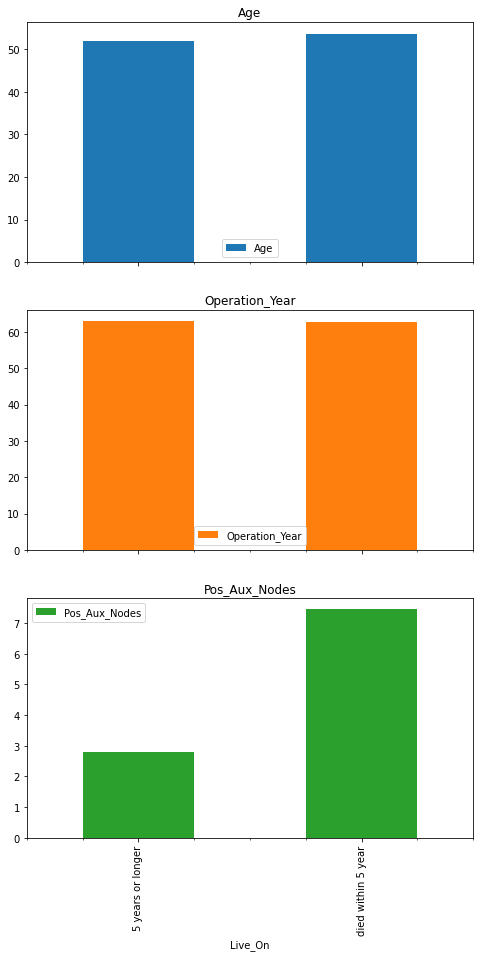

In [20]:
new_df.groupby("Live_On").mean().plot(kind="bar", subplots=True, figsize=(8, 15))
plt.show()

In [21]:
df.groupby("Live_On").agg({"Age":["mean", "median", "count"], "Pos_Aux_Nodes": ["mean", "median"]})

Age              Pos_Aux_Nodes       
                         mean median count          mean median
Live_On                                                        
5 years or longer   52.017778     52   225      2.791111      0
died within 5 year  53.679012     53    81      7.456790      4

In [22]:
cross_df = pd.crosstab(index=new_df.Age, columns = new_df.Live_On, values=new_df.Pos_Aux_Nodes, aggfunc="count", margins=True).fillna(0).sort_values(by="All", ascending=False)

In [23]:
cross_df[1:11]

Live_On,5 years or longer,died within 5 year,All
Age,,,
52,10.0,4.0,14
54,9.0,4.0,13
50,10.0,2.0,12
47,8.0,3.0,11
57,8.0,3.0,11
43,7.0,4.0,11
53,5.0,6.0,11
38,9.0,1.0,10
55,8.0,2.0,10


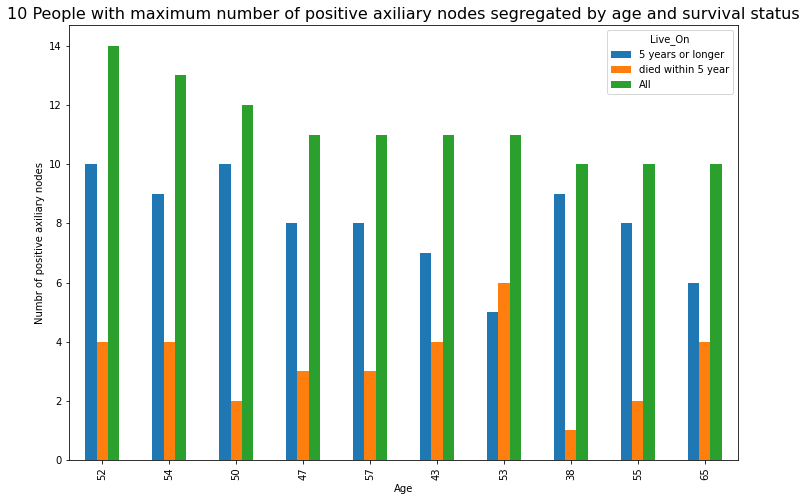

In [24]:
cross_df[1:11].plot(kind="bar", figsize=(12, 8))
plt.title("10 People with maximum number of positive axiliary nodes segregated by age and survival status", fontsize=16)
plt.ylabel("Numbr of positive axiliary nodes")
plt.show()

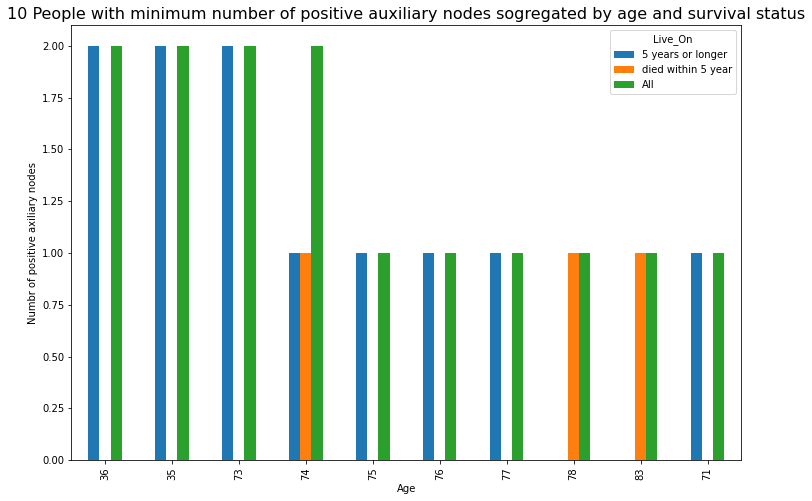

In [25]:
cross_df[-10:].plot(kind="bar", figsize=(12, 8))
plt.title("10 People with minimum number of positive auxiliary nodes sogregated by age and survival status", fontsize=16)
plt.ylabel("Numbr of positive axiliary nodes")
plt.show()

### **Model creation**

In [26]:
df.drop(columns="Live_On", inplace=True)

In [27]:
df["Survival_Status"].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

<AxesSubplot:xlabel='Survival_Status', ylabel='count'>

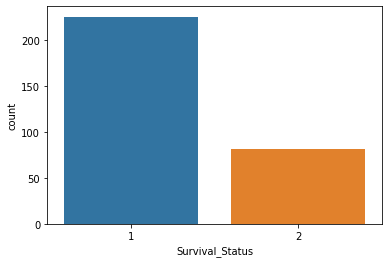

In [28]:
sns.countplot(data=df, x="Survival_Status")

Survival status (class attribute) <br >
**1** = the patient survived 5 years or longer <br>
**2** = the patient died within 5 year

Dataset is imbalanced, so accuracy cannot be used for model evaluation.

In [29]:
df.corr()["Survival_Status"].sort_values()

Operation_Year    -0.004768
Age                0.067950
Pos_Aux_Nodes      0.286768
Survival_Status    1.000000
Name: Survival_Status, dtype: float64

<AxesSubplot:xlabel='Survival_Status', ylabel='Pos_Aux_Nodes'>

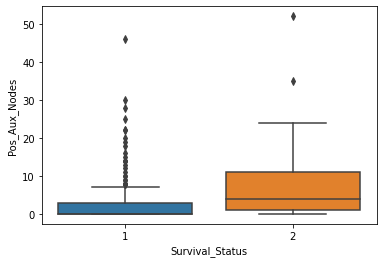

In [30]:
sns.boxplot(x="Survival_Status", y="Pos_Aux_Nodes", data=df)

<AxesSubplot:xlabel='Survival_Status', ylabel='Age'>

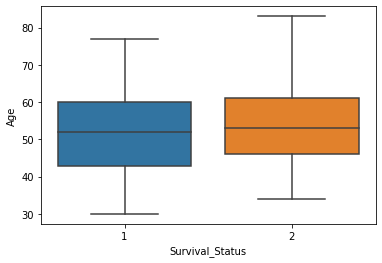

In [31]:
sns.boxplot(x="Survival_Status", y="Age", data=df)

<AxesSubplot:xlabel='Age', ylabel='Pos_Aux_Nodes'>

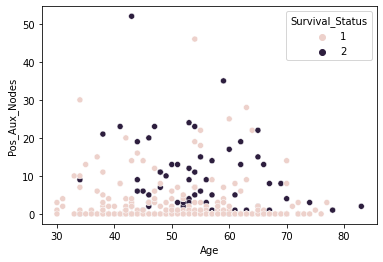

In [32]:
sns.scatterplot(x='Age',y='Pos_Aux_Nodes',data=df,hue='Survival_Status')

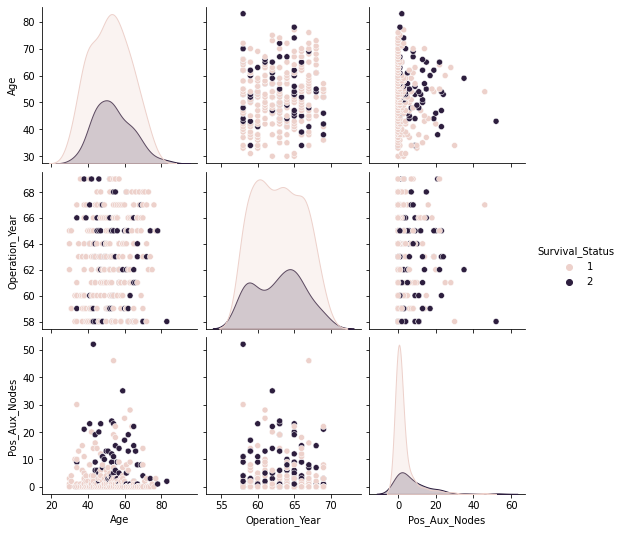

In [33]:
sns.pairplot(df, hue="Survival_Status")

<AxesSubplot:xlabel='Pos_Aux_Nodes', ylabel='Survival_Status'>

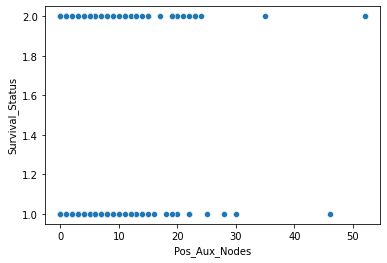

In [34]:
sns.scatterplot(x="Pos_Aux_Nodes", y="Survival_Status", data=df)

<AxesSubplot:xlabel='Age', ylabel='Survival_Status'>

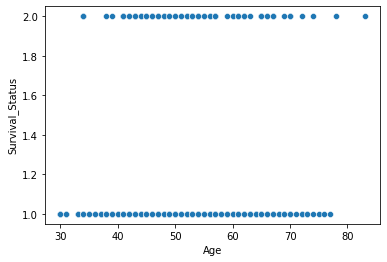

In [35]:
sns.scatterplot(x="Age", y="Survival_Status", data=df)

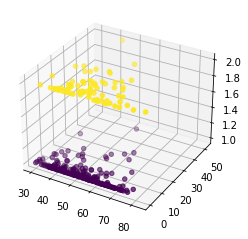

In [36]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'],df['Pos_Aux_Nodes'],df['Survival_Status'],c=df['Survival_Status'])

#### Train | Test | Split | Scaling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X = df.drop("Survival_Status", axis=1)
y = df["Survival_Status"]

In [39]:
X_train, X_OTHER, y_train, y_OTHER = train_test_split(X, y, test_size=0.2, random_state=1)
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=1)

In [40]:
scaler = StandardScaler()

In [41]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_eval = scaler.transform(X_eval)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be conv

In [44]:
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [45]:
model.coef_

array([[ 0.06411068, -0.048128  ,  0.68621367]])

In [46]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [47]:
y_pred = model.predict(scaled_X_eval)

In [48]:
confusion_matrix(y_eval, y_pred)

array([[22,  2],
       [ 4,  3]])

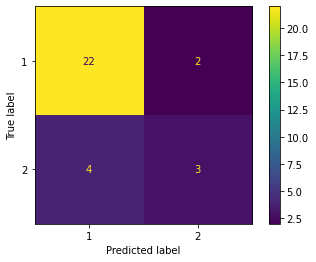

In [49]:
plot_confusion_matrix(model, scaled_X_eval, y_eval)

In [50]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.92      0.88        24
           2       0.60      0.43      0.50         7

    accuracy                           0.81        31
   macro avg       0.72      0.67      0.69        31
weighted avg       0.79      0.81      0.79        31



In [51]:
len(X_train)

244

In [52]:
len(X_eval)

31

In [53]:
len(X_test)

31

**Model Adjustment**

In [54]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [55]:
model = LogisticRegression()
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3, 3, 50),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'class_weight': ["balanced"]
}

clf = GridSearchCV(model,                     
                   param_grid = parameters,   
                   scoring='roc_auc',       
                   cv=10)                     

clf.fit(scaled_X_train, y_train)

print("Tuned Hyperparameters :", clf.best_params_)
print("Precission :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.03906939937054617, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Precission : 0.7019491129785248


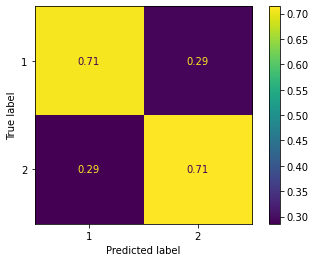

In [56]:
y_pred = clf.predict(scaled_X_eval)
plot_confusion_matrix(clf, scaled_X_eval, y_eval, normalize="true")

In [57]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.71      0.79        24
           2       0.42      0.71      0.53         7

    accuracy                           0.71        31
   macro avg       0.66      0.71      0.66        31
weighted avg       0.79      0.71      0.73        31



In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [59]:
print(precision_score(y_eval, y_pred))
print(recall_score(y_eval, y_pred))
print(f1_score(y_eval, y_pred))

0.8947368421052632
0.7083333333333334
0.7906976744186046
